In [36]:
from jmetal.algorithm.multiobjective import NSGAII
from jmetal.operator.crossover import SBXCrossover
from jmetal.operator.mutation import PolynomialMutation
from jmetal.problem import Fonseca
from jmetal.util.termination_criterion import StoppingByEvaluations
from jmetal.util.solution import get_non_dominated_solutions, print_function_values_to_file
from jmetal.core.quality_indicator import NormalizedHyperVolume, InvertedGenerationalDistance
import numpy as np

problem = Fonseca()

algorithm = NSGAII(
    problem=problem,
    population_size=100,
    offspring_population_size=100,
    mutation=PolynomialMutation(0.7, distribution_index=20),
    crossover=SBXCrossover(0.5, distribution_index=20),
    termination_criterion=StoppingByEvaluations(max_evaluations=10000)
)

algorithm.solutions = algorithm.create_initial_solutions()
algorithm.solutions = algorithm.evaluate(algorithm.solutions)
algorithm.init_progress()

ref_front = np.loadtxt("resources/reference_fronts/Fonseca.pf")
hv_ref_point = np.max(ref_front, axis=0) + 0.1

i = 0
while not algorithm.stopping_condition_is_met():
    i += 1
    print('Iteration: ' + str(i))
    algorithm.step()
    algorithm.update_progress()
    
    result = algorithm.result()
    front = get_non_dominated_solutions(algorithm.result())
    front_values = np.array([s.objectives for s in front])

    nhv = NormalizedHyperVolume(hv_ref_point, ref_front)
    igd = InvertedGenerationalDistance(ref_front)
    
    if (i == 1 or i == 5 or i == 10 or i == 50):
        print(f'nHV = {nhv.compute(front_values)}')
        print(f'IGD = {igd.compute(front_values)}')
        print_function_values_to_file(front, f'results/selected_generations/FUN.NSGAII.Fonseca.{i}')

[2025-10-10 20:08:55,117] [jmetal.util.solution] [INFO] Output file (function values): results/selected_generations/FUN.NSGAII.Fonseca.1


Iteration: 1
nHV = 0.7767951314768793
IGD = 0.31547056224372066
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


[2025-10-10 20:08:55,276] [jmetal.util.solution] [INFO] Output file (function values): results/selected_generations/FUN.NSGAII.Fonseca.5


nHV = 0.18538455632451323
IGD = 0.06058754357696523
Iteration: 6
Iteration: 7
Iteration: 8


[2025-10-10 20:08:55,901] [jmetal.util.solution] [INFO] Output file (function values): results/selected_generations/FUN.NSGAII.Fonseca.10


Iteration: 9
Iteration: 10
nHV = 0.06476105183531733
IGD = 0.02008047736903953
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48


[2025-10-10 20:08:57,825] [jmetal.util.solution] [INFO] Output file (function values): results/selected_generations/FUN.NSGAII.Fonseca.50


Iteration: 49
Iteration: 50
nHV = 0.014835646004529801
IGD = 0.005094978387304374
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
Iteration: 73
Iteration: 74
Iteration: 75
Iteration: 76
Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iteration: 95
Iteration: 96
Iteration: 97
Iteration: 98
Iteration: 99


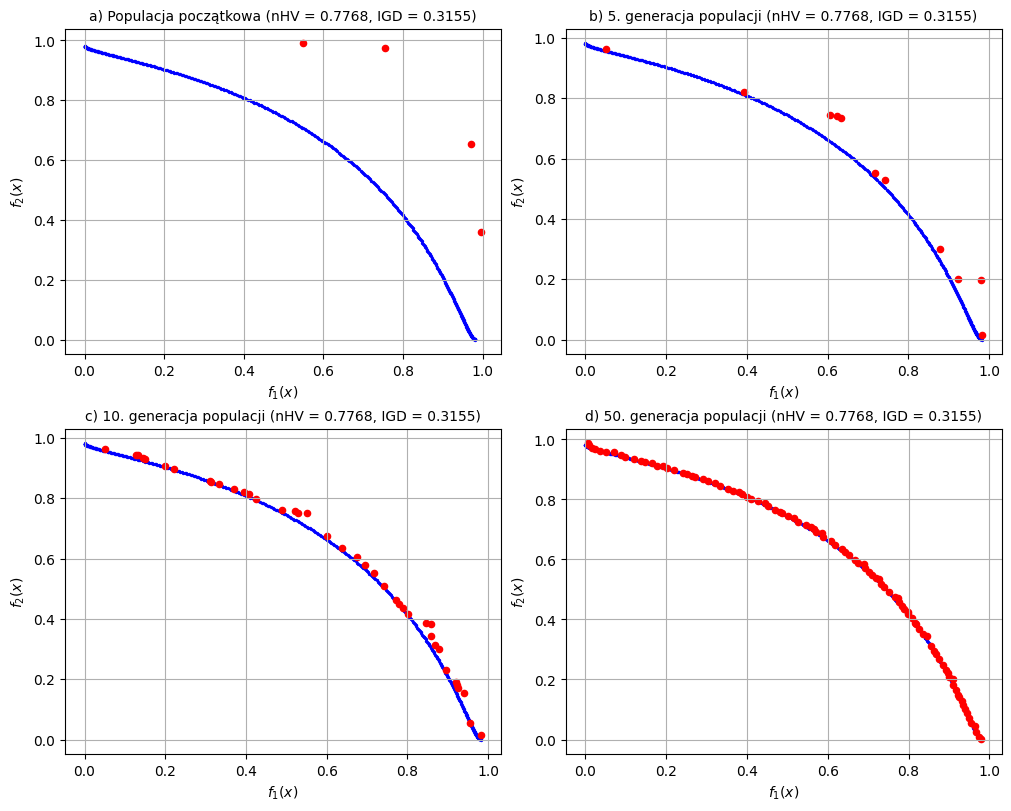

In [1]:
import plots
plots.draw_selected_generations()